In [ ]:
# https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [1]:
# 驗證函數
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

In [2]:
# 驗證一
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [3]:
import pandas_datareader.data as web
# 第一個數據
predict_days = 5 # 用過去七天預測下一天
df = web.DataReader('2330.tw', 'yahoo', '1999-01-01', '2020-06-15')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-3:]

C:\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Date   High    Low   Open  Close      Volume  Adj Close TickerId  \
4999 2020-04-22  295.0  290.5  294.5  294.0  42192580.0      294.0     2330   
5000 2020-04-23  300.0  294.0  300.0  295.5  39474478.0      295.5     2330   
5001 2020-04-24  297.0  294.0  295.5  294.0  26008090.0      294.0     2330   

     TickerName  
4999        台積電  
5000        台積電  
5001        台積電

In [4]:
# 使用台積電股價 驗證  ????
# define input sequence
raw_seq = data.Close #[10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 5
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

In [5]:
# 使用 LSTM 看前看後記憶
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
n_steps = predict_days
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [6]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [7]:
# fit model
history = model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
4997/4997 [==============================] - 3s 694us/step - loss: 1898.6844
Epoch 2/50
4997/4997 [==============================] - 3s 521us/step - loss: 10.8097
Epoch 3/50
4997/4997 [==============================] - 3s 515us/step - loss: 10.1670
Epoch 4/50
4997/4997 [==============================] - 3s 558us/step - loss: 8.9272
Epoch 5/50
4997/4997 [==============================] - 3s 518us/step - loss: 8.6554
Epoch 6/50
4997/4997 [==============================] - 3s 627us/step - loss: 8.0659
Epoch 7/50
4997/4997 [==============================] - 3s 584us/step - loss: 8.8547 0s - loss: 8.877 - ETA: 0s - loss: 8.895
Epoch 8/50
4997/4997 [==============================] - 3s 666us/step - loss: 7.8431
Epoch 9/50
4997/4997 [==============================] - 3s 538us/step - loss: 6.4253
Epoch 10/50
4997/4997 [==============================] - 3s 626us/step - loss: 6.2452
Epoch 11/50
4997/4997 [==============================] - 3s 542us/step - loss: 7.1757 0
Epoch 12/50
499

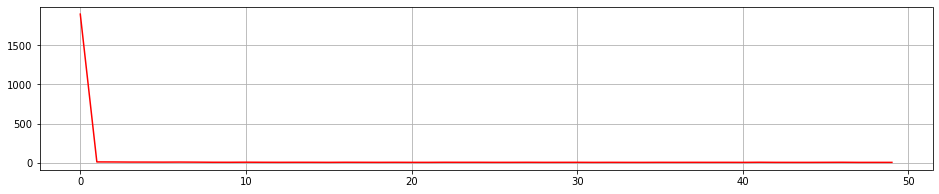

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,3))
plt.grid()
plt.plot( history.history.get('loss') , color='red')
plt.show()

In [9]:
# 使用 Deep Learning 進行預測
# 重要數據
pre_Close = model.predict(X).ravel()
Close = y

sum((pre_Close - Close)**2) / len(Close)

6.613366492357898

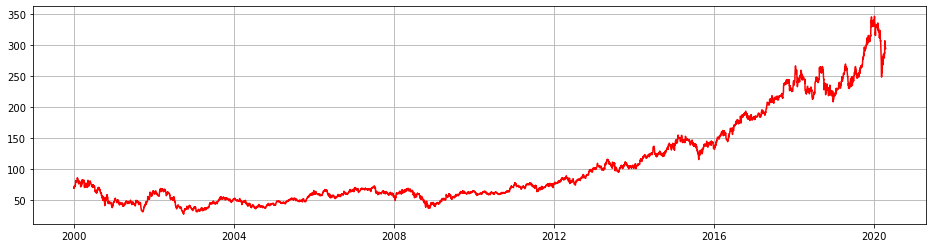

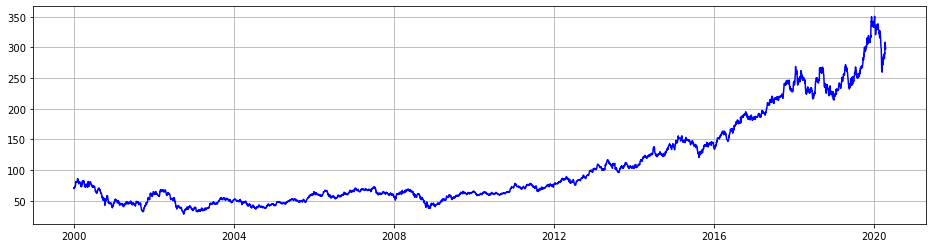

In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data_plot = data[:len(pre_Close)]

plt.figure(figsize=(16,4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), Close, color='red')
plt.show()

plt.figure(figsize=(16,4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), pre_Close, color='blue')
plt.show()

In [11]:
X.shape
model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))

array([[298.53442]], dtype=float32)

In [12]:
X[-1]

array([[306.5],
       [304. ],
       [295. ],
       [294. ],
       [295.5]])

In [13]:
# 針對最近數據預測 Deep Learning
# 預測下個十天TSMC 股價
import numpy as np
from datetime import timedelta

# 下一天
next_data = X[-1]
next_day = model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))
print(next_day[0], data.Date[-1:].dt.strftime("%Y-%m-%d").values[0])

#next_data, next_day[0]

#np.vstack( (next_data , next_day[0]) )[-5:, :]


# 剩下的天數 再預測
for i in range(1, 10, 1):
    next_data = np.vstack( (next_data , next_day[0]) )[-1*predict_days:, :]
    next_day = model.predict(next_data.reshape(1, next_data.shape[0], next_data.shape[1]))
    print(next_day[0],  (data.Date[-1:] + timedelta(days=i)).dt.strftime("%Y-%m-%d").values[0]  )


[298.53442] 2020-04-24
[301.01813] 2020-04-25
[304.4538] 2020-04-26
[308.38263] 2020-04-27
[312.59613] 2020-04-28
[317.01865] 2020-04-29
[321.62766] 2020-04-30
[326.37723] 2020-05-01
[331.2571] 2020-05-02
[336.26648] 2020-05-03
